__Cuaderno de trabajo de:__ Nombre Apellido

In [1]:
import random
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

### Números pseudo-aleatorios

Cualquier lenguaje de programación tiene una función random, que cuando la llamamos nos devuelve un número pseudo-aleatorio entre 0 y 1. Todos los números entre 0 y 1 son *"igualmente probables"

In [2]:
random.random?

In [3]:
#Cada vez que ejecutamos este código obtenemos un número distinto:
random.random()

0.0342915628388617

In [4]:
#Generamos 10 números pseudo-aleatorios y los imprimimos
for i in range(10):
    print(random.random())

0.6818834580393809
0.8753849808776709
0.8857389958656752
0.39866179572590277
0.7573798547949077
0.5456314238403107
0.8766907304213315
0.3682697787035417
0.5468410827952913
0.76472843877865


Además, python nos ofrece otras funciones prácticas:

 - ``random.randint(a,b)`` devuelve un número entero entre a y b (inclusive). Todos los números entre a y b son *"igualmente probables"*.
 - ``random.choice(lista)`` devuelve un elemento de ``lista`` (que debe ser una lista, cadena de caracteres, conjunto...). Todos los elementos son *"igualmente probables"*.

In [5]:
for i in range(10):
    print (random.randint(10,20))

17
13
12
13
10
15
15
20
11
14


In [6]:
for i in range(10):
    print(random.choice('AEIOU'))

E
U
O
A
E
I
O
O
U
E


### Semilla aleatoria

Estos números parecen aleatorios, pero **el ordenador los obtiene aplicando reglas deterministas**. Sólo parecen aleatorios, pero *la cpu no lanza dados cuando llamamos a random*.

Esto no es un inconveniente en la práctica, porque son casi imposibles de distinguir de números auténticamente aleatorios.
De hecho, es una virtud, porque si fijamos la **semilla aleatoria**, podemos obtener exactmente los mismos números, aunque hagamos el cálculo en máquinas distintas varios años después.

In [7]:
#Si cambias la semilla, las elecciones cambian, pero con la misma semilla
#obtenemos los mismos resultados
random.seed(1)
for i in range(10):
    print (random.random())
for i in range(10):
    print (random.randint(10,20))
for i in range(10):
    print(random.choice('AEIOU'))
for i in range(10):
    print(random.choice(["hola","adiós","¿Qué tal?", "ahora vengo"]))

0.13436424411240122
0.8474337369372327
0.763774618976614
0.2550690257394217
0.49543508709194095
0.4494910647887381
0.651592972722763
0.7887233511355132
0.0938595867742349
0.02834747652200631
16
16
19
10
17
14
13
19
11
15
A
A
A
U
A
O
E
O
A
U
adiós
ahora vengo
ahora vengo
adiós
¿Qué tal?
adiós
adiós
ahora vengo
¿Qué tal?
hola


### Distribución de Bernoulli

Un experimento aleatorio *sigue una distribución de Bernoulli* si hay dos posibles resultados:

  - 0, con probabilidad 1-p
  - 1, con probabilidad p

Cualquier experimento aleatorio con dos resultados se puede representar mediante una distribución de Bernouilli asignando a uno de los dos posibles resultados el valor 0 y al otro, el valor 1:

  - Hacemos una salida con el barco, anotamos "1" si vemos algún cetáceo, "0" en otro caso. Si la probabilidad de avistamiento es del 5%, es una Bernoulli con p=0,05.
  - En cada día de operación, anotamos "**1**" si el sistema de comunicación *falla*, "0" si funciona. Si la probabilidad de fallo es del 10%, es una Bernoulli con p=0,1.
  - En cada día de operación, anotamos "**0**" si el sistema de comunicación *falla*, "1" si funciona. Si la probabilidad de fallo es del 10%, es una Bernoulli con p=0,9.

In [8]:
#La distribución depende de un parametro
p0 = 0.25
#El objeto Ber contiene los metodos asociados a una 
#distribucion concreta de la familia Bernoulli
Ber = st.bernoulli(p=p0)

La función de masa de una distribución de probabilidad indica la probabilidad de obtener cada posible resultado.

Ber.pmf(0) es la probabilidad de obtener 0 y Ber.pmf(1) es la probabilidad de obtener 1.


In [9]:
#Usando Ber.pmf, podemos ver cuál es la probabilidad de 
#obtener 0, o de obtener 1
print(Ber.pmf(0), Ber.pmf(1))

0.75 0.25


Una extracción aleatoria de la distribución nos devuelve un número aleatorio en el espacio muestral de la distribución, pero de tal forma que cuando hacemos muchas extracciones cada resultado aparece una proporción de veces parecida a la probabilidad que le asigna la funcion de masa.

Ber.rvs(N) devuelve un array con N extracciones aleatorias independientes de la distribución Ber (una muestra).


In [10]:
#Cada vez que ejecutas esta celda, el resultado varía
muestra = Ber.rvs(20)
muestra

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [16]:
# ATENCION: no hay que fijar la semilla aleatoria con random.seed, 
#sino con np.random.seed(semilla)
#random.seed(12)
np.random.seed(12)
muestra = Ber.rvs(20)
muestra

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

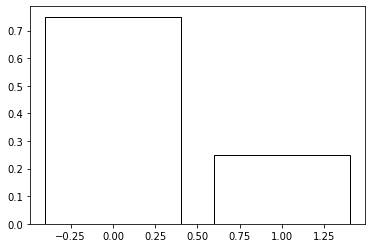

In [19]:
#Usando Ber.pmf, podemos ver cuál es la probabilidad de 
#obtener 0, o de obtener 1
plt.bar([0,1],[Ber.pmf(0), Ber.pmf(1)], fill=False)
plt.show()

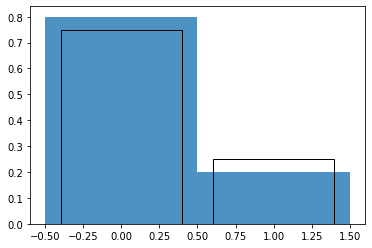

In [20]:
#Ejecutalo varias veces y veras como la forma cambia
#A veces se parece más, otras veces menos
muestra = Ber.rvs(10)
plt.hist(muestra, bins=[-0.5,0.5,1.5], density=1,alpha=0.8)
plt.bar([0,1],[Ber.pmf(0), Ber.pmf(1)],fill=False)
plt.show()

Pero si aumentamos el tamaño de la muestra aleatoria se parece mucho mas a la función de masa.


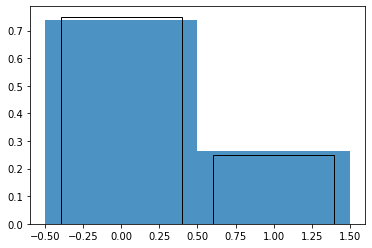

In [21]:
#Pero si aumentamos el tamanyo se parece mucho mas
muestra = Ber.rvs(1000)
plt.hist(muestra, bins=[-0.5,0.5,1.5], density=1,alpha=0.8)
plt.bar([0,1],[Ber.pmf(0), Ber.pmf(1)],fill=False)
plt.show()